We will perform a classification on Fashion MNIST.

In [1]:
from keras.datasets import fashion_mnist

(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import numpy as np
np.unique(train_label).shape

(10,)

0


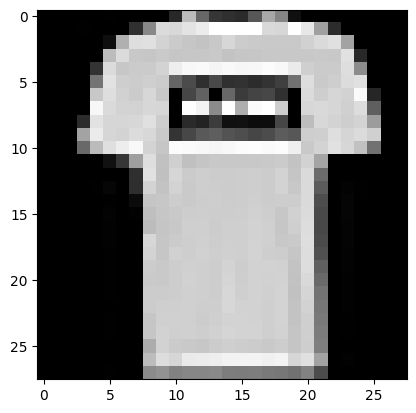

In [3]:
import matplotlib.pyplot as plt

print(train_label[1])
plt.imshow(train_image[1], cmap='gray')

In [4]:
train_image = train_image.reshape(-1, 28*28)
test_image = test_image.reshape(-1, 28*28)
train_image = train_image/255
test_image = test_image/255
np.max(train_image)

np.float64(1.0)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(500, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(120, activation='relu'),
    Dropout(0.2),
    Dense(120, activation='relu'),
    # Dense(20, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
H = model.fit(train_image, train_label, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6848 - loss: 0.8762 - val_accuracy: 0.8215 - val_loss: 0.4801
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8336 - loss: 0.4743 - val_accuracy: 0.8541 - val_loss: 0.3933
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8508 - loss: 0.4232 - val_accuracy: 0.8644 - val_loss: 0.3806
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8628 - loss: 0.3893 - val_accuracy: 0.8542 - val_loss: 0.3915
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8662 - loss: 0.3772 - val_accuracy: 0.8681 - val_loss: 0.3818
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8676 - loss: 0.3656 - val_accuracy: 0.8729 - val_loss: 0.3447
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8757 - loss: 0.3526 - val_accuracy: 0.8743 - val_loss: 0.3429
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8795 - loss: 0.3417 

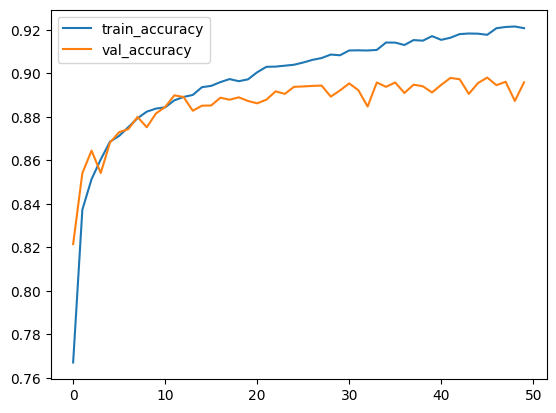

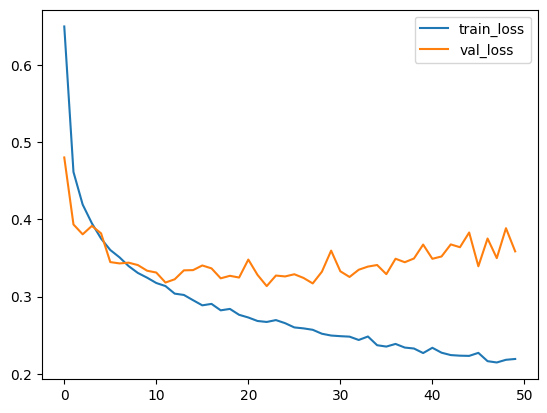

In [8]:
plt.plot(H.history['accuracy'], label='train_accuracy')
plt.plot(H.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [9]:
model.evaluate(test_image, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8885 - loss: 0.4141


[0.401451975107193, 0.8884000182151794]